<h1><center>CMPE 462 - Project 2<br>Implementing an SVM Classifier<br>Due: May 18, 2020, 23:59</center></h1>

* **Student ID1:2016400198**
* **Student ID2:2016400126**
* **Student ID3:2018400279**

## Overview

In this project, you are going to implement SVM. For this purpose, a data set (data.mat) is given to you. You can load the mat dataset into Python using the function `loadmat` in `Scipy.io`. When you load the data, you will obtain a dictionary object, where `X` stores the data matrix and `Y` stores the labels. You can use the first 150 samples for training and the rest for testing. In this project, you will use the software package [`LIBSVM`](http://www.csie.ntu.edu.tw/~cjlin/libsvm/) to implement SVM. Note that `LIBSVM` has a [`Python interface`](https://github.com/cjlin1/libsvm/tree/master/python), so you can call the SVM functions in Python. 

## Task 1 - 30 pts

Train a hard margin linear SVM and report both train and test classification accuracy.

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from libsvm import svmutil as svm

In [2]:
mat = scipy.io.loadmat('data.mat')

y_train = mat['Y'][:150,:].squeeze()
X_train = mat['X'][:150,:]

print(X_train.shape)

y_test = mat['Y'][150:,:].squeeze()
X_test = mat['X'][150:,:]
options = '-c 1e10'  # Very high C value imitates hard margin SVM
# Training Model
model = svm.svm_train(y_train, X_train, options)


In [3]:
svm.svm_predict(y_test, X_test, model)
svm.svm_predict(y_train, X_train, model)

Accuracy = 76.6667% (92/120) (classification)
Accuracy = 100% (150/150) (classification)


([1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  -1.

## Task 2 - 40 pts

Train soft margin SVM for different values of the parameter $C$, and with different kernel functions. Systematically report your results. For instance, report the performances of different kernels for a fixed $C$, then report the performance for different $C$ values for a fixed kernel, and so on.

In [4]:
c_values = ['0.1','1','2','5','10']
t_values = {0:"Linear", 1:"Polynomial", 2:"RBS", 3:"Sigmoid"}

for c in c_values:
    for t in t_values.keys():
        options = "-t {} -c {}".format(t, c)
        model = svm.svm_train(y_train, X_train, options)
        print("Kernel:",t_values[t], '-- C =', c)
        pred_values, (acc,mse,scc), pred_values = svm.svm_predict(y_test, X_test, model)
        print('\n')

Kernel: Linear -- C = 0.1
Accuracy = 83.3333% (100/120) (classification)


Kernel: Polynomial -- C = 0.1
Accuracy = 58.3333% (70/120) (classification)


Kernel: RBS -- C = 0.1
Accuracy = 84.1667% (101/120) (classification)


Kernel: Sigmoid -- C = 0.1
Accuracy = 84.1667% (101/120) (classification)


Kernel: Linear -- C = 1
Accuracy = 85% (102/120) (classification)


Kernel: Polynomial -- C = 1
Accuracy = 82.5% (99/120) (classification)


Kernel: RBS -- C = 1
Accuracy = 84.1667% (101/120) (classification)


Kernel: Sigmoid -- C = 1
Accuracy = 84.1667% (101/120) (classification)


Kernel: Linear -- C = 2
Accuracy = 83.3333% (100/120) (classification)


Kernel: Polynomial -- C = 2
Accuracy = 83.3333% (100/120) (classification)


Kernel: RBS -- C = 2
Accuracy = 82.5% (99/120) (classification)


Kernel: Sigmoid -- C = 2
Accuracy = 85% (102/120) (classification)


Kernel: Linear -- C = 5
Accuracy = 81.6667% (98/120) (classification)


Kernel: Polynomial -- C = 5
Accuracy = 80.8333% (97/120) 

## Task 3 - 15 pts

Please report how the number of support vectors changes as the value of $C$ increases (while all other parameters remain the same). Discuss whether your observations match the theory.

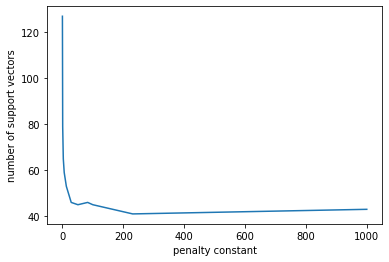

In [5]:
n_of_s_vectors = []
c_values = ['0.1','1','3','6','13','29','51','83','1e+2','231','1e+3',]
for c in c_values:
    options = "-t 3 -c {}".format(c)
    model = svm.svm_train(y_train, X_train, options)
    n_of_s_vectors.append(len(model.get_SV()))

c_values = list(map(float,c_values))
plt.plot(c_values,n_of_s_vectors)
plt.ylabel('number of support vectors')
plt.xlabel('penalty constant')
plt.show()

## Task 4 - 15 pts

Please investigate the changes in the hyperplane when you remove one of the support vectors, vs., one data point that is not a support vector.

In [6]:
# main training model
options = "-t 0 -c 0.1"
main_model = svm.svm_train(y_train, X_train, options)

In [7]:
index = main_model.get_sv_indices()[0]-1

sv_removed_x_train = np.concatenate([X_train[:index],X_train[index+1:]])
sv_removed_y_train = np.concatenate([y_train[:index],y_train[index+1:]])

model_sv_removed = svm.svm_train(sv_removed_y_train, sv_removed_x_train, options)

In [8]:
# one non support vector removed model

index = -1
for i in range(len(X_train)):
    data = X_train[i,:]
    for sv in main_model.get_SV():
        if (list(data) != list(sv.values())[:-1]):
            index = i
            break
    if index != -1:
        break

non_sv_removed_x_train = np.concatenate([X_train[:index],X_train[index+1:]])
non_sv_removed_y_train = np.concatenate([y_train[:index],y_train[index+1:]])

model_non_sv_removed = svm.svm_train(non_sv_removed_y_train, non_sv_removed_x_train, options)

In [9]:
svm.svm_predict(y_test, X_test, main_model)
svm.svm_predict(y_test, X_test, model_sv_removed)
svm.svm_predict(y_test, X_test, model_non_sv_removed)

Accuracy = 83.3333% (100/120) (classification)
Accuracy = 85% (102/120) (classification)
Accuracy = 83.3333% (100/120) (classification)


([-1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  1.0],
 (83.33333333333334, 0.6666666666666666, 0.43183673469387757),
 [[-1.3919809760766488],
 

In [10]:
print("Main Model:", len(main_model.get_SV()))
print("SV removed Model:", len(model_sv_removed.get_SV()))
print("Non-SV removed Model:", len(model_non_sv_removed.get_SV()))

Main Model: 74
SV removed Model: 73
Non-SV removed Model: 74


In [11]:
# All support vectors of the main model and the model trained with one non-sv data point missing data are exactly the same.
main_model.get_SV() == model_non_sv_removed.get_SV()

True

In [12]:
main_model_sv_arr = X_train[np.array(main_model.get_sv_indices())-1,:]
model_sv_removed_sv_arr = sv_removed_x_train[np.array(model_sv_removed.get_sv_indices())-1,:]
model_non_sv_removed_sv_arr = non_sv_removed_x_train[np.array(model_non_sv_removed.get_sv_indices())-1,:]

In [13]:
main_model_weights = np.matmul(np.array(main_model.get_sv_coef()).T, main_model_sv_arr)
model_sv_removed_weights = np.matmul(np.array(model_sv_removed.get_sv_coef()).T, model_sv_removed_sv_arr)
model_non_sv_removed_weights = np.matmul(np.array(model_non_sv_removed.get_sv_coef()).T, model_non_sv_removed_sv_arr)

In [14]:
print(main_model_weights)

[[-0.06778313  0.29866279  0.58209869  0.10258802  0.08010807  0.0009001
   0.05038589 -0.5104812   0.1776037   0.13125647  0.15436003  0.8823835
   0.47563777]]


In [15]:
print(model_sv_removed_weights)

[[-0.05855969  0.2866585   0.63597603  0.13676829  0.05694247 -0.00680732
   0.0800928  -0.50702316  0.2076861   0.15059528  0.16007441  0.94541053
   0.42195553]]


In [16]:
print(model_non_sv_removed_weights)

[[-0.06778313  0.29866279  0.58209869  0.10258802  0.08010807  0.0009001
   0.05038589 -0.5104812   0.1776037   0.13125647  0.15436003  0.8823835
   0.47563777]]


As we can see, when we removed a non-sv data point, hyperplane did not change. On the contrary, removing sv data point changed the hyperplane, as expected.

### Bonus Task - 10 pts

Use Python and [CVXOPT](http://cvxopt.org) QP solver to implement the hard margin SVM. 